### IAC-622 Homework Submission for Leena Godbole

In [1]:
# Libraries

import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import patoolib
import random
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
# evaluate random forest algorithm for classification
from numpy import mean
from numpy import std

from matplotlib import pyplot
import statistics
from sklearn import metrics

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Lasso
from sklearn.metrics import accuracy_score, confusion_matrix



# settings
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# seed
random.seed(42)

### Importing feature spaces from homework 1 & data preperation

In [2]:
# Importing arrays from homework 1

# block feature arrays
image012 = pd.read_csv('image012.csv')
image01 = pd.read_csv('image01.csv')

# sliding block arrays

image0_SB = pd.read_csv('image0_SlidingBlock.csv')
image1_SB = pd.read_csv('image1_SlidingBlock.csv')
image2_SB = pd.read_csv('image2_SlidingBlock.csv')

# labeling sliding block arrays
image0_SB['label'] = 0                 # Acadian Flycatcher =  0
image1_SB['label']  = 1             # Vermillion Flycatcher =  1
image2_SB['label']  = 2          # ScissorTailed Flycatcher =  2


# concatenating slidng block arrays
image012_SB = pd.concat([image0_SB, image1_SB, image2_SB], ignore_index=True, axis=0)
image01_SB = pd.concat([image0_SB, image1_SB], ignore_index=True, axis=0)

# randomizing the arrays 
image012 =  image012.sample(frac=1, random_state=1)
image01 =  image01.sample(frac=1, random_state=1)

image012_SB = image012_SB.sample(frac=1, random_state=1)
image01_SB =  image01_SB.sample(frac=1, random_state=1)

### Task 1 -  train test splits

In [3]:
# defining the FEATRUES vs the LABEL
# The features will be named with X and the label will be named with y

image012_X = image012.iloc[:, :-1]
image012_y = image012.iloc[:, -1]

image01_X = image01.iloc[:, :-1]
image01_y = image01.iloc[:, -1]

image012_SB_X = image012_SB.iloc[:, :-1]
image012_SB_y = image012_SB.iloc[:, -1]

image01_SB_X = image01_SB.iloc[:, :-1]
image01_SB_y = image01_SB.iloc[:, -1]


In [4]:
# seperating arrays into train and test

#train, test = train_test_split(df, test_size=0.2)

image012_X_train, image012_X_test, image012_y_train, image012_y_test  = train_test_split(image012_X, # dataframe
                                                                                         image012_y, # labels
                                                                                         stratify = image012_y, # maintains class balance in each split
                                                                                         test_size=0.2) # 80/20 split


image01_X_train, image01_X_test, image01_y_train, image01_y_test  = train_test_split(image01_X, # dataframe
                                                                                         image01_y, # labels
                                                                                         stratify = image01_y, # maintains class balance in each split
                                                                                         test_size=0.2) # 80/20 split


# Sliding block splits, opting to do a 70/30 split due to increased data size

image012_SB_X_train, image012_SB_X_test, image012_SB_y_train, image012_SB_y_test  = train_test_split(image012_SB_X, # dataframe
                                                                                         image012_SB_y, # labels
                                                                                         stratify = image012_SB_y, # maintains class balance in each split
                                                                                         test_size=0.3) # 70/30 split


image01_SB_X_train, image01_SB_X_test, image01_SB_y_train, image01_SB_y_test  = train_test_split(image01_SB_X, # dataframe
                                                                                         image01_SB_y, # labels
                                                                                         stratify = image01_SB_y, # maintains class balance in each split
                                                                                         test_size=0.3) # 70/30 split

In [5]:
# Checking train / test splits are correct

print('image012_X_train dimension are ' + str(image012_X_train.shape))
print('image012_y_train dimension are ' + str(image012_y_train.shape) +'\n')

print('image012_X_test dimension are ' + str(image012_X_test.shape))
print('image012_y_test dimension are ' + str(image012_y_test.shape)+'\n')

print('image01_X_train dimension are ' + str(image01_X_train.shape))
print('image01_y_train dimension are ' + str(image01_y_train.shape) +'\n')

print('image01_X_test dimension are ' + str(image01_X_test.shape))
print('image01_y_test dimension are ' + str(image01_y_test.shape)+'\n')

print('Sliding Block Vectors')

print('image012_SB_X_train dimension are ' + str(image012_SB_X_train.shape))
print('image012_SB_y_train dimension are ' + str(image012_SB_y_train.shape) +'\n')

print('image012_SB_X_test dimension are ' + str(image012_SB_X_test.shape))
print('image012_SB_y_test dimension are ' + str(image012_SB_y_test.shape)+'\n')

print('image01_SB_X_train dimension are ' + str(image01_SB_X_train.shape))
print('image01_SB_y_train dimension are ' + str(image01_SB_y_train.shape) +'\n')

print('image01_SB_X_test dimension are ' + str(image01_SB_X_test.shape))
print('image01_SB_y_test dimension are ' + str(image01_SB_y_test.shape)+'\n')

print('looks good to me!')

image012_X_train dimension are (1190, 256)
image012_y_train dimension are (1190,)

image012_X_test dimension are (298, 256)
image012_y_test dimension are (298,)

image01_X_train dimension are (793, 256)
image01_y_train dimension are (793,)

image01_X_test dimension are (199, 256)
image01_y_test dimension are (199,)

Sliding Block Vectors
image012_SB_X_train dimension are (322198, 256)
image012_SB_y_train dimension are (322198,)

image012_SB_X_test dimension are (138086, 256)
image012_SB_y_test dimension are (138086,)

image01_SB_X_train dimension are (214799, 256)
image01_SB_y_train dimension are (214799,)

image01_SB_X_test dimension are (92057, 256)
image01_SB_y_test dimension are (92057,)

looks good to me!


### PCA

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


def PricinpalComponent(trainSet, cmp): # trainset = train dataset, cmp = number of components
    scalar = StandardScaler()
    trainSet = scalar.fit_transform(trainSet)
    pcal = PCA(n_components = cmp)
    trainSet = pcal.fit_transform(trainSet)
    return trainSet

In [7]:
# Creating PCA datasets with 50 features

num_features = 199

# train features
image012_X_train_PCA = PricinpalComponent(image012_X_train,num_features)
image01_X_train_PCA = PricinpalComponent(image01_X_train,num_features)

image012_SB_X_train_PCA =PricinpalComponent(image012_SB_X_train,num_features)
image01_SB_X_train_PCA = PricinpalComponent(image01_SB_X_train,num_features)

# test features
image012_X_test_PCA = PricinpalComponent(image012_X_test,num_features)
image01_X_test_PCA = PricinpalComponent(image01_X_test,num_features)

image012_SB_X_test_PCA = PricinpalComponent(image012_SB_X_test,num_features)
image01_SB_X_test_PCA = PricinpalComponent(image01_SB_X_test,num_features)

In [8]:
# Checking PCA datasetshapes to make sure dimensions all match

# Checking train / test splits are correct

print('image012_X_train_PCA dimension are ' + str(image012_X_train_PCA.shape))
print('image012_y_train dimension are ' + str(image012_y_train.shape) +'\n')

print('image012_X_test_PCA dimension are ' + str(image012_X_test_PCA.shape))
print('image012_y_test dimension are ' + str(image012_y_test.shape)+'\n')

print('image01_X_train_PCA dimension are ' + str(image01_X_train_PCA.shape))
print('image01_y_train dimension are ' + str(image01_y_train.shape) +'\n')

print('image01_X_test_PCA dimension are ' + str(image01_X_test_PCA.shape))
print('image01_y_test dimension are ' + str(image01_y_test.shape)+'\n')

print('Sliding Block Vectors')

print('image012_SB_X_train_PCA dimension are ' + str(image012_SB_X_train_PCA.shape))
print('image012_SB_y_train dimension are ' + str(image012_SB_y_train.shape) +'\n')

print('image012_SB_X_test_PCA dimension are ' + str(image012_SB_X_test_PCA.shape))
print('image012_SB_y_test dimension are ' + str(image012_SB_y_test.shape)+'\n')

print('image01_SB_X_train_PCA dimension are ' + str(image01_SB_X_train_PCA.shape))
print('image01_SB_y_train dimension are ' + str(image01_SB_y_train.shape) +'\n')

print('image01_SB_X_test_PCA dimension are ' + str(image01_SB_X_test_PCA.shape))
print('image01_SB_y_test dimension are ' + str(image01_SB_y_test.shape)+'\n')

print('looks good to me!')

image012_X_train_PCA dimension are (1190, 199)
image012_y_train dimension are (1190,)

image012_X_test_PCA dimension are (298, 199)
image012_y_test dimension are (298,)

image01_X_train_PCA dimension are (793, 199)
image01_y_train dimension are (793,)

image01_X_test_PCA dimension are (199, 199)
image01_y_test dimension are (199,)

Sliding Block Vectors
image012_SB_X_train_PCA dimension are (322198, 199)
image012_SB_y_train dimension are (322198,)

image012_SB_X_test_PCA dimension are (138086, 199)
image012_SB_y_test dimension are (138086,)

image01_SB_X_train_PCA dimension are (214799, 199)
image01_SB_y_train dimension are (214799,)

image01_SB_X_test_PCA dimension are (92057, 199)
image01_SB_y_test dimension are (92057,)

looks good to me!


### Additional functions 

In [9]:
#  Code below is pulled from scikit-learn.org to plot confusion matricies

from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Purples):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    Source: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.figure(figsize = (10, 10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, size = 24)
    plt.colorbar(aspect=4)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, size = 14)
    plt.yticks(tick_marks, classes, size = 14)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.

    # Labeling the plot
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), fontsize = 20,
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.grid(None)
    plt.tight_layout()
    plt.ylabel('True label', size = 18)
    plt.xlabel('Predicted label', size = 18)

### Task 3 - LASSO Classifier

#### This is a funtion that does the following:

1) creates a LASSO model, alpha = 1  
2) fits the model with the train data 
3) generates the confusion matricies for the train & test data 
4) records model metrics in a summary table 
5) saves the pretty confusion matricies with specific file names 

Inputs for function:  \
    x = train dataset features \
    Y = train dataset label \
    x_test = test dataset features \
    Y_test = test dataset label \
    label = dataset name, e.g. 'Image01' \
    classLabels = Y labels, used for confusion matrix.  e.g. ['Image0', 'Image1', 'image2'] \



In [10]:
# Empty lists to store metrics for each model as they are calculated
ModelMetrics = []

def LASSOModel(x, Y, x_test, Y_test, label,  classLabels):
        # Model Parameters - used to change what dataset is getting modeled
        # Defining model    
        model = Lasso(alpha=1)
        modelName = 'LASSO'


        testTitle = 'Confusion Matrix - LASSO - ' + label +  ' Test Data'  # Used to name plots
        trainTitle = 'Confusion Matrix - LASSO - ' + label +  'Train Data' # used to name plots

        model.fit(x, Y)
        
        Train_Predict = model.predict(x)
        Test_Predict = model.predict(x_test)
    

        cm_test = confusion_matrix(Y_test, Test_Predict.round())
        cm_train = confusion_matrix(Y, Train_Predict.round())


        ModelMetrics.append([label,
                             modelName,
                             (metrics.accuracy_score(Y, Train_Predict.round())), 
                             (metrics.f1_score(Y, Train_Predict.round(), average='weighted')),
                             (metrics.accuracy_score(Y_test, Test_Predict.round())), 
                             (metrics.f1_score(Y_test, Test_Predict.round(), average='weighted'))])



        plot_confusion_matrix(cm_train, classLabels , title = trainTitle)
        plt.savefig(trainTitle)

        plot_confusion_matrix(cm_test, classLabels, title = testTitle)
        plt.savefig(testTitle)
        

### Task 3 -  Random Forest Classifier, n_estimators = 100

#### This is a funtion that does the following:

1) creates a Random Forest Classifier, n_estimators = 100
2) fits the model with the train data 
3) generates the confusion matricies for the train & test data 
4) records model metrics in a summary table 
5) saves the pretty confusion matricies with specific file names 

Inputs for function:  \
    x = train dataset features \
    Y = train dataset label \
    x_test = test dataset features \
    Y_test = test dataset label \
    label = dataset name, e.g. 'Image01' \
    classLabels = Y labels, used for confusion matrix.  e.g. ['Image0', 'Image1', 'image2'] \
    ntrees = number of trees in the forest



In [11]:
def RandomForestModel(x, Y, x_test, Y_test, label,  classLabels, ntrees):
        # Model Parameters - used to change what dataset is getting modeled
       # x = image012_X_train
       # Y = image012_y_train
       # x_test = image012_X_test
       # Y_test = image012_y_test
       # label = 'Image012'
       # classLabels = ['Image0', 'Image1', 'image2']

        # Defining model    
        model = RandomForestClassifier(n_estimators=ntrees,
                                       random_state=42,
                                       max_features = 'sqrt',
                                       n_jobs=-1, verbose = 1)
        
        modelName = 'Random Forest'


        testTitle = 'Confusion Matrix - RF - ' + label +  ' Test Data'  # Used to name plots
        trainTitle = 'Confusion Matrix - RF - ' + label +  'Train Data' # used to name plots



        # K fold x validation
        # cv = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 2, random_state=1)
        # n_scores = cross_val_score(model, 
        #                          image01_X_train, 
        #                           image01_y_train, 
        #                           scoring='accuracy', 
        #                           cv=cv, n_jobs=-1, 
        #                           error_score='raise')


        model.fit(x, Y)
        Train_Predict = model.predict(x)
        Test_Predict = model.predict(x_test)

        cm_test = confusion_matrix(Y_test, Test_Predict)
        cm_train = confusion_matrix(Y, Train_Predict)


        ModelMetrics.append([label,
                             modelName,
                             metrics.accuracy_score(Y, Train_Predict), 
                             metrics.f1_score(Y, Train_Predict, average='weighted'),
                             metrics.accuracy_score(Y_test, Test_Predict), 
                             metrics.f1_score(Y_test, Test_Predict, average='weighted')])



        plot_confusion_matrix(cm_train, classLabels , title = trainTitle)
        plt.savefig(trainTitle)

        plot_confusion_matrix(cm_test, classLabels, title = testTitle)
        plt.savefig(testTitle)





### Task 3 - running models using functions defined above

Confusion matrix, without normalization
[[ 94 301   1]
 [ 32 266  99]
 [  0 394   3]]
Confusion matrix, without normalization
[[25 74  1]
 [ 9 61 29]
 [ 0 99  0]]


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished


Confusion matrix, without normalization
[[396   0   0]
 [  0 397   0]
 [  0   0 397]]
Confusion matrix, without normalization
[[85 14  1]
 [16 82  1]
 [11 19 69]]


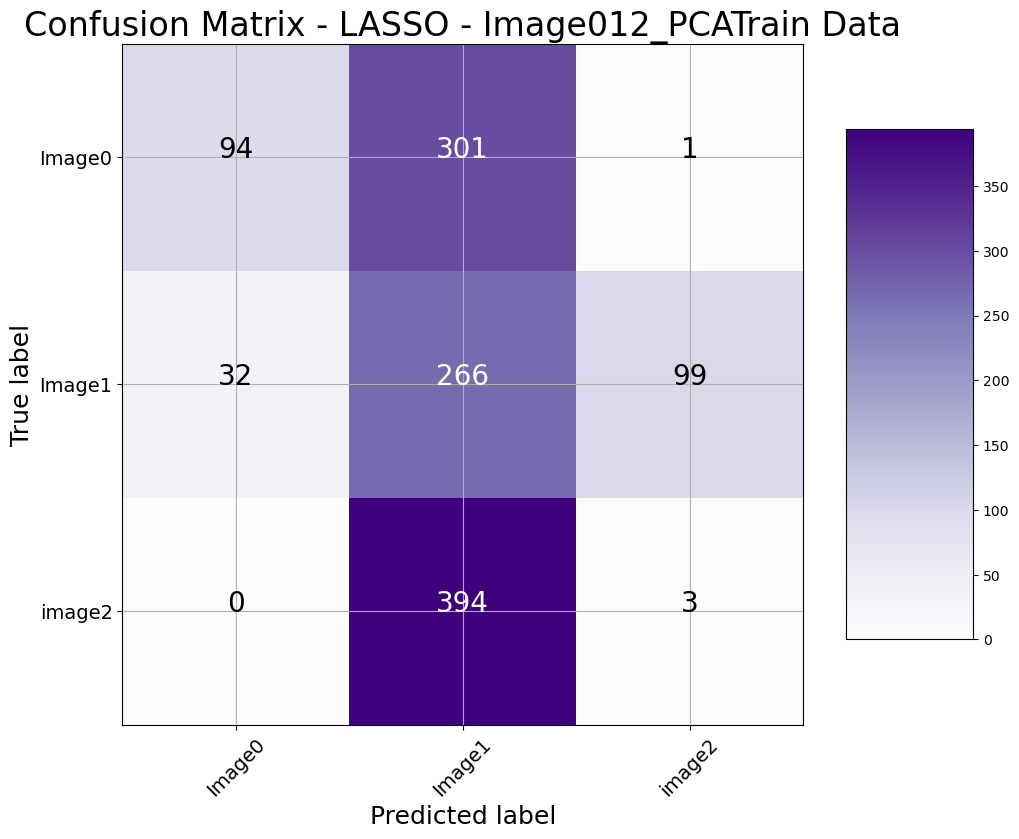

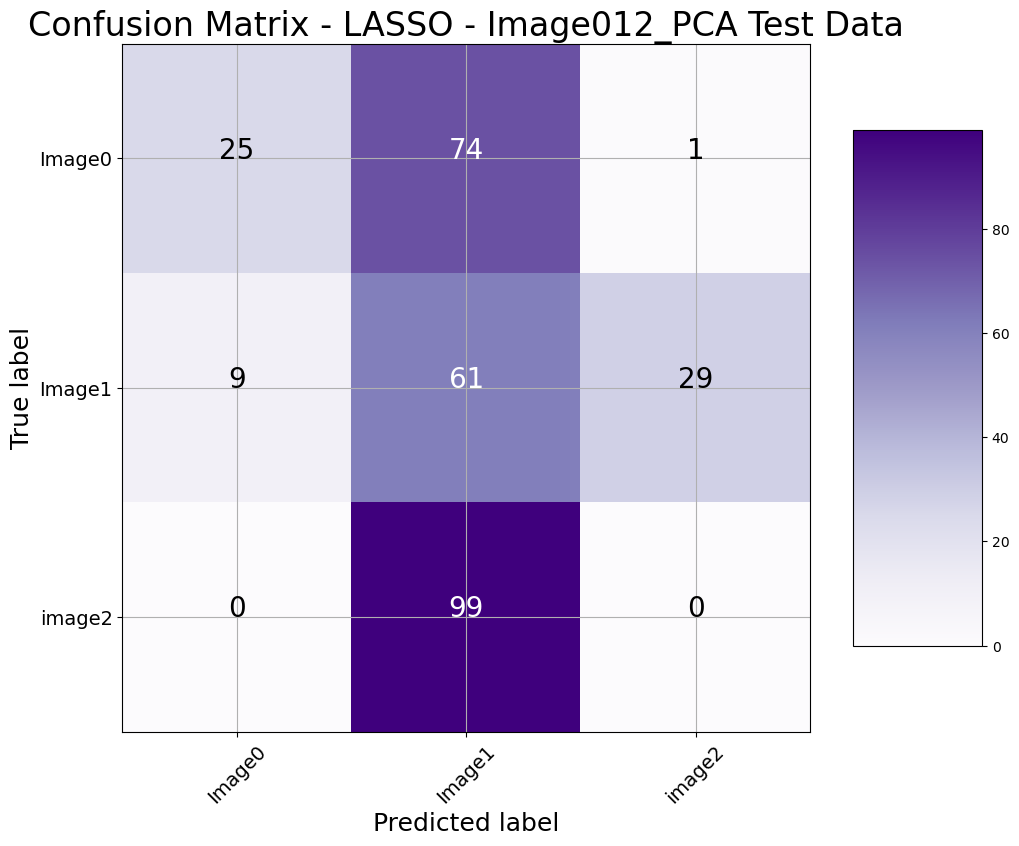

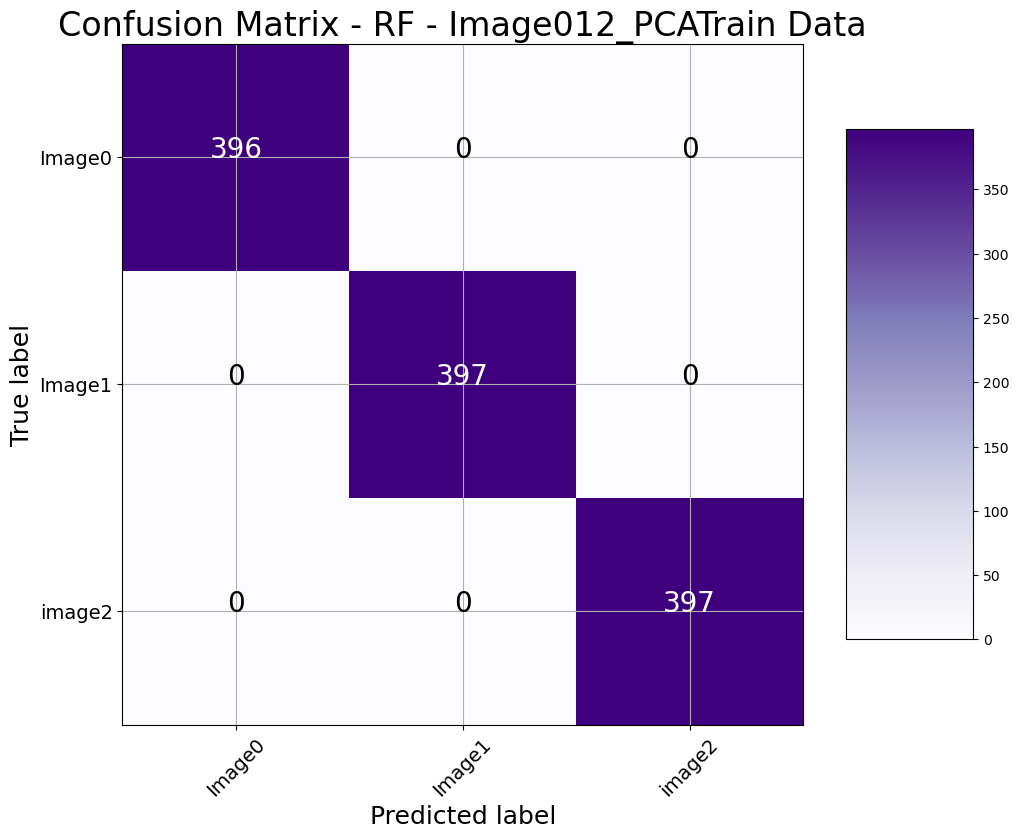

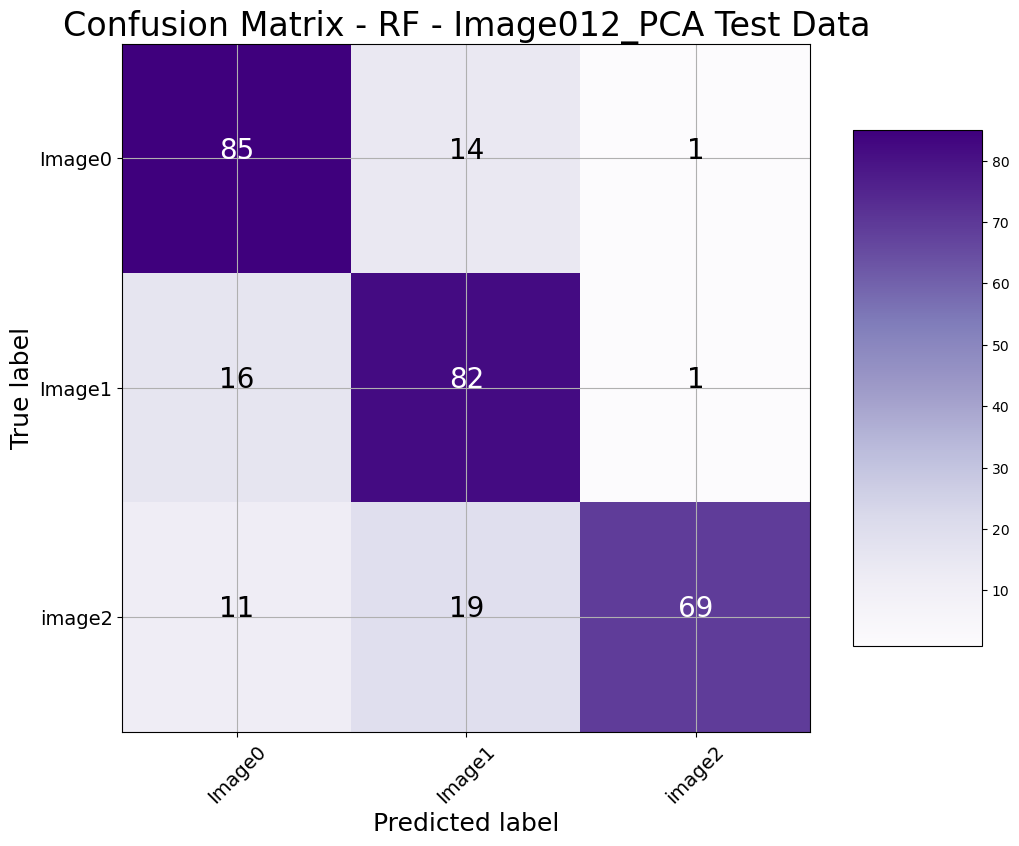

In [12]:
#Model Parameters - used to change what dataset is getting modeled
x = image012_X_train_PCA
Y = image012_y_train
x_test = image012_X_test_PCA
Y_test = image012_y_test
label = 'Image012_PCA'
classLabels = ['Image0', 'Image1', 'image2']
ntrees = 100

LASSOModel(x, Y, x_test, Y_test, label,  classLabels)
RandomForestModel(x, Y, x_test, Y_test, label,  classLabels, ntrees)




Confusion matrix, without normalization
[[  1694 105682     24]
 [ 10456  92627   4316]
 [     0 107396      3]]
Confusion matrix, without normalization
[[  671 45345    12]
 [ 4511 39682  1836]
 [    0 46026     3]]


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  3.4min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    2.2s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    1.1s finished


Confusion matrix, without normalization
[[107390      2      8]
 [    10 107389      0]
 [     5      0 107394]]
Confusion matrix, without normalization
[[43213  2075   740]
 [ 4809 40900   320]
 [ 3544  1881 40604]]


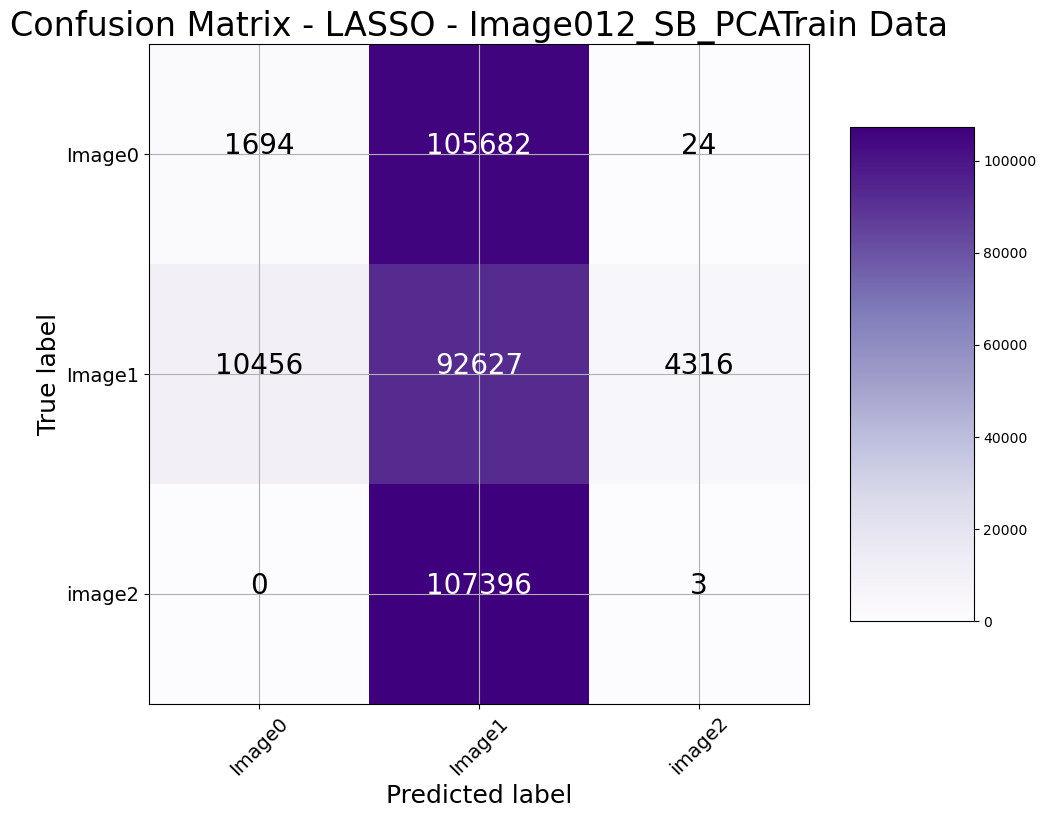

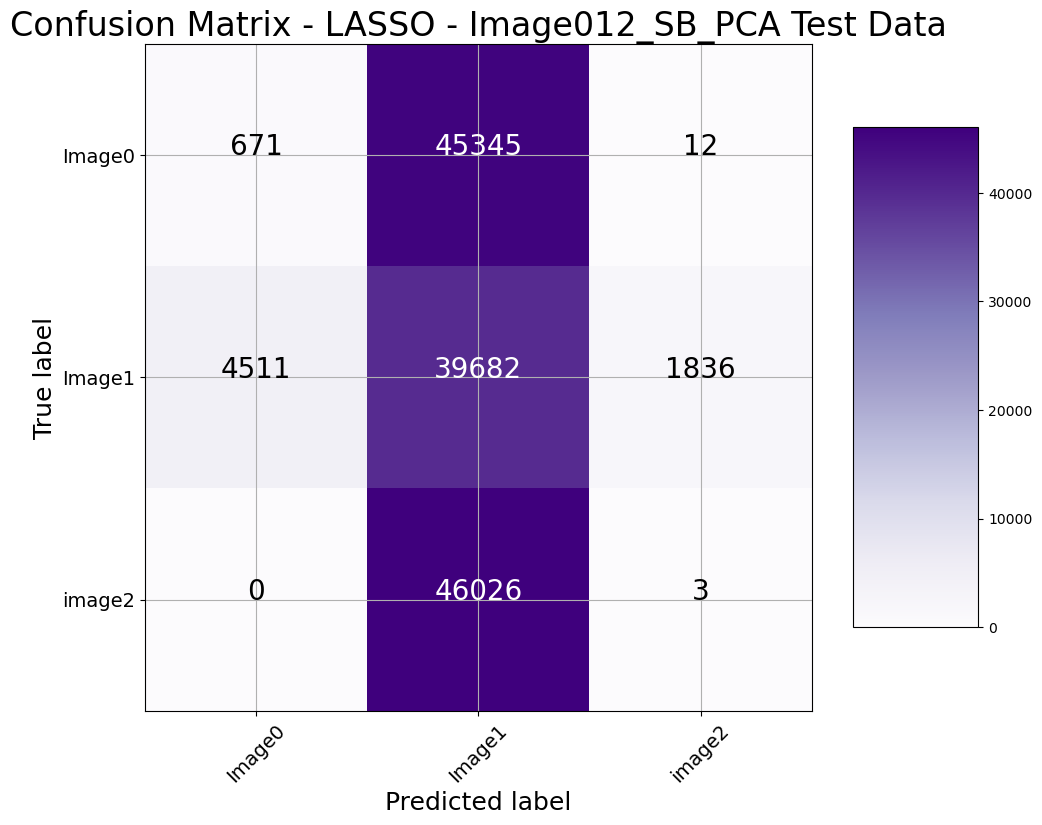

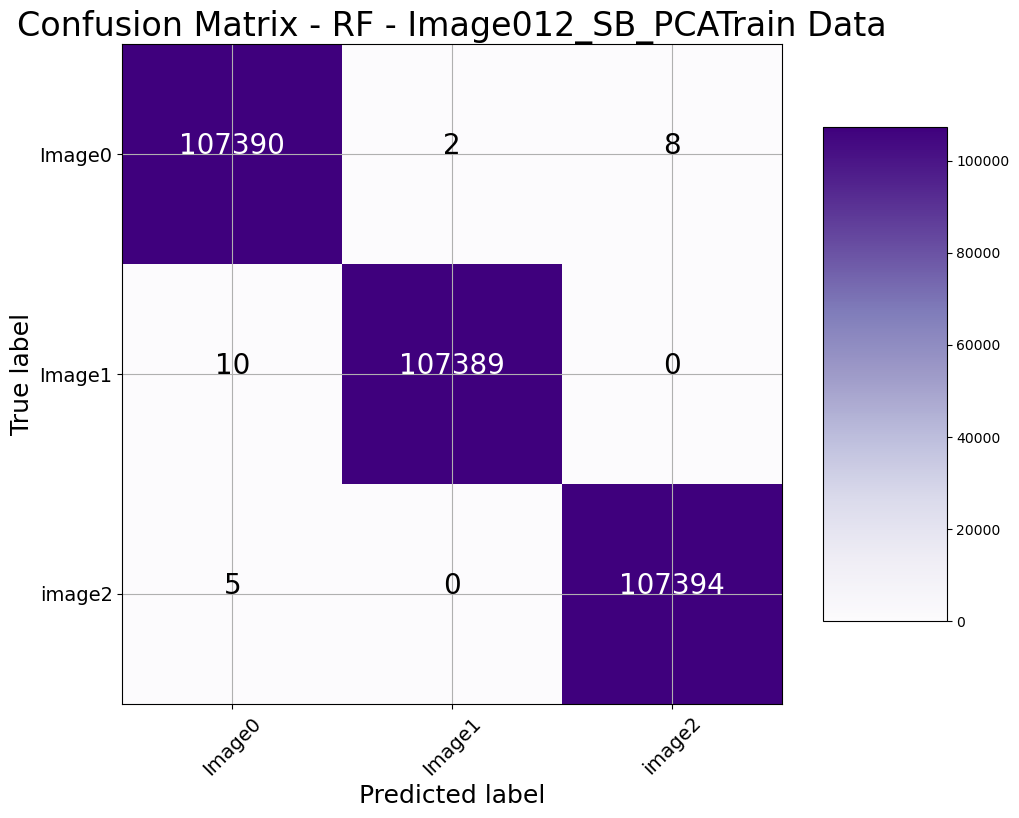

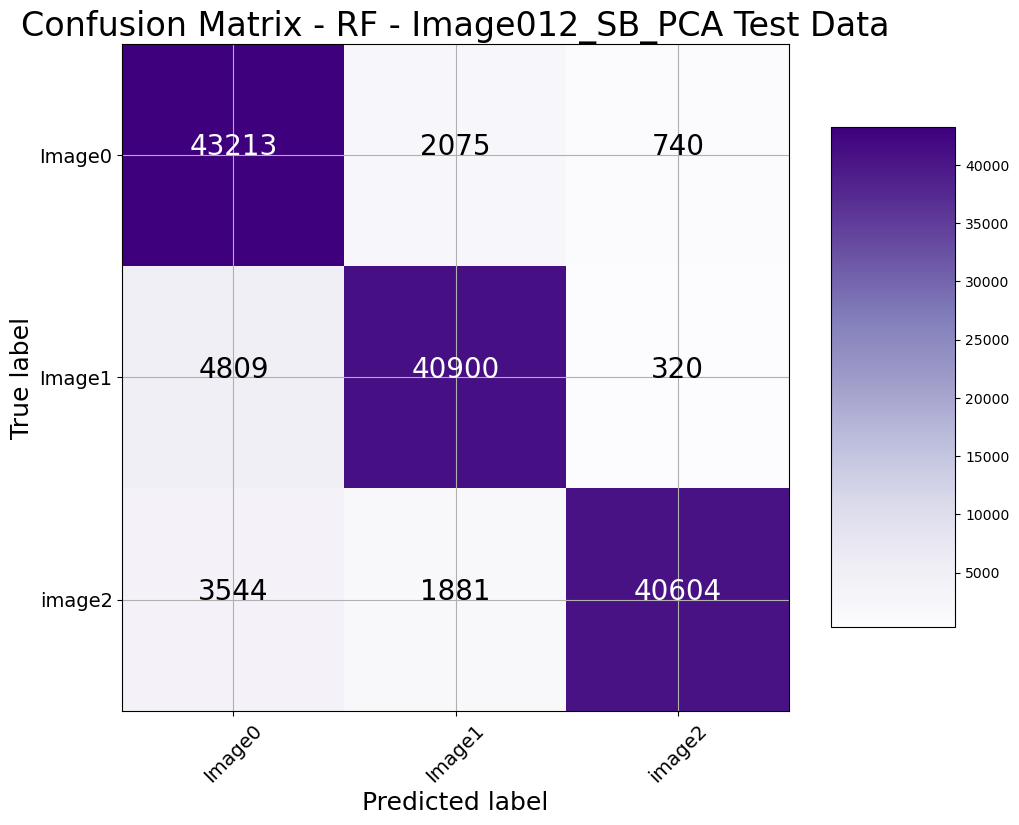

In [13]:
x = image012_SB_X_train_PCA
Y = image012_SB_y_train
x_test = image012_SB_X_test_PCA
Y_test = image012_SB_y_test
label = 'Image012_SB_PCA'
classLabels = ['Image0', 'Image1', 'image2']
ntrees = 20

LASSOModel(x, Y, x_test, Y_test, label,  classLabels)
RandomForestModel(x, Y, x_test, Y_test, label,  classLabels, ntrees)

 

Confusion matrix, without normalization
[[350  47]
 [ 95 301]]
Confusion matrix, without normalization
[[86 13]
 [27 73]]


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.4s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished


Confusion matrix, without normalization
[[397   0]
 [  0 396]]
Confusion matrix, without normalization
[[86 13]
 [27 73]]


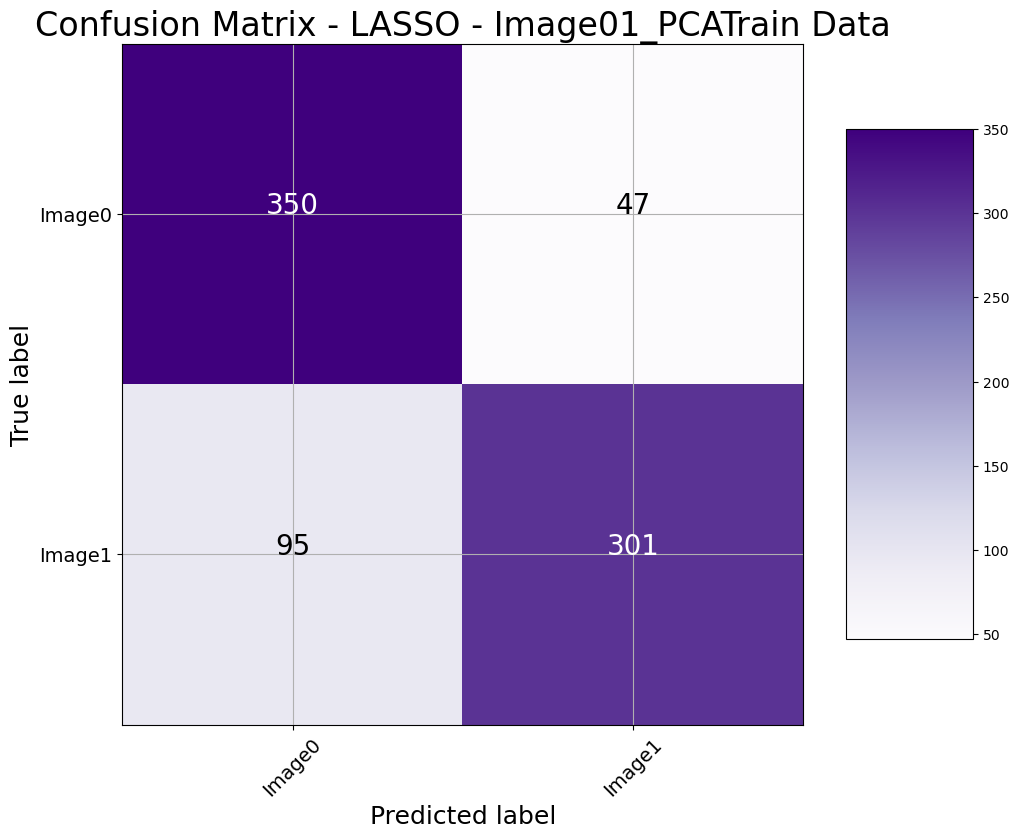

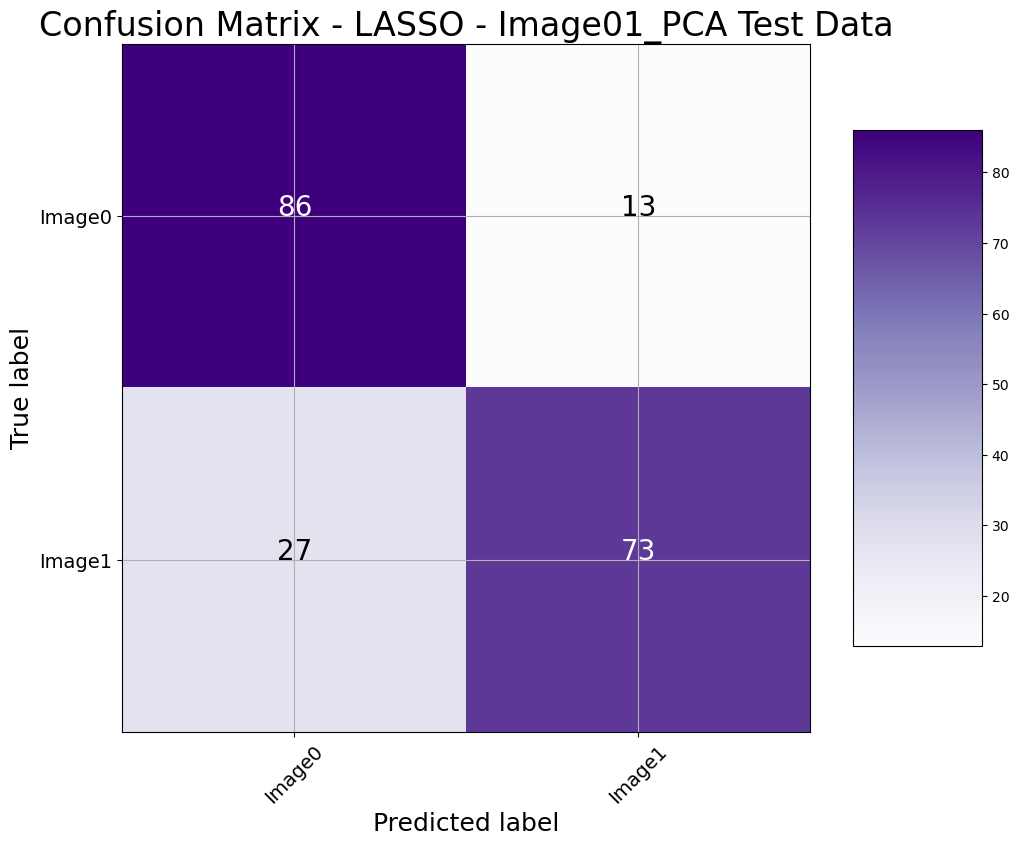

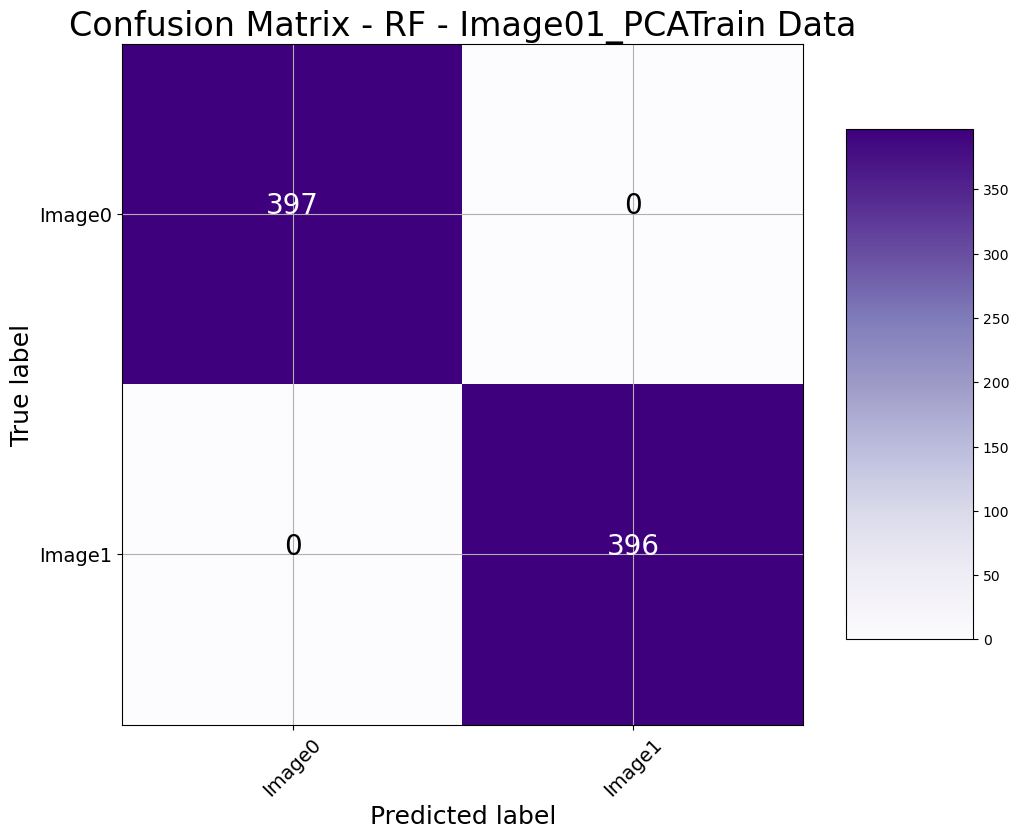

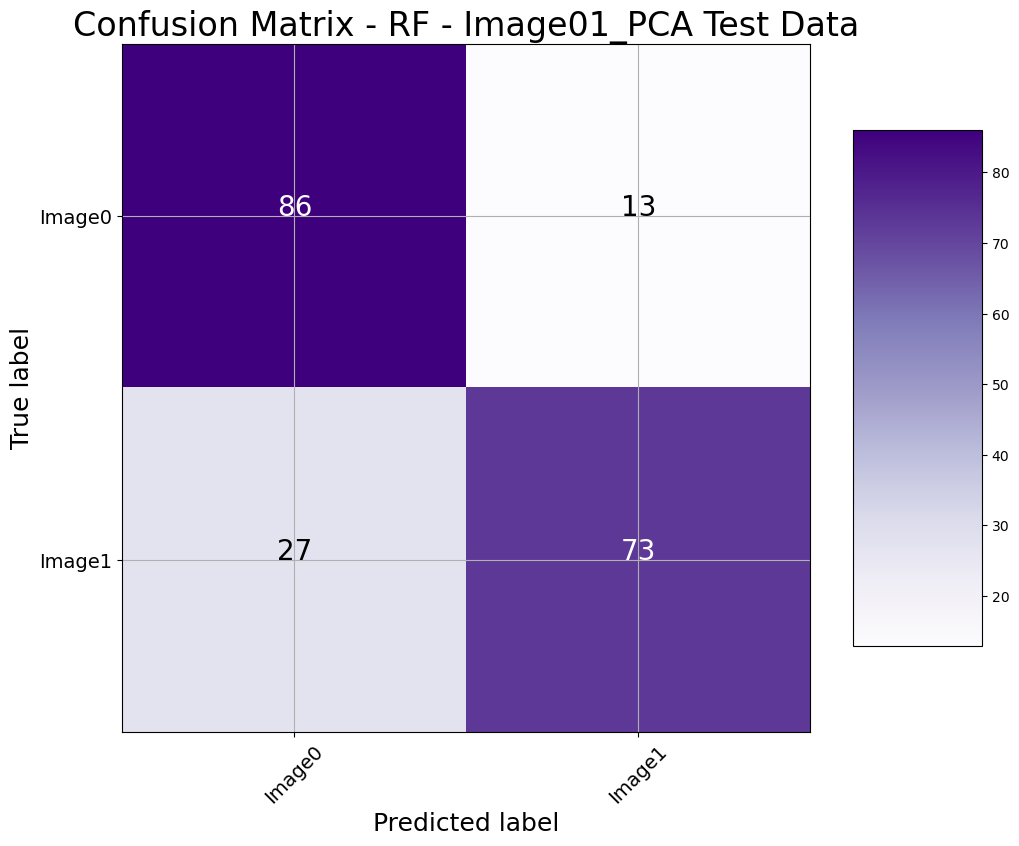

In [14]:
   
x = image01_X_train_PCA
Y = image01_y_train
x_test = image01_X_test_PCA
Y_test = image01_y_test
label = 'Image01_PCA'
classLabels = ['Image0', 'Image1']
ntrees = 100

LASSOModel(x, Y, x_test, Y_test, label,  classLabels)
RandomForestModel(x, Y, x_test, Y_test, label,  classLabels, ntrees)




Confusion matrix, without normalization
[[86799 20601]
 [33387 74012]]
Confusion matrix, without normalization
[[37157  8871]
 [14282 31747]]


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  2.8min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    1.5s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    0.4s finished


Confusion matrix, without normalization
[[107400      0]
 [    24 107375]]
Confusion matrix, without normalization
[[44394  1634]
 [ 4938 41091]]


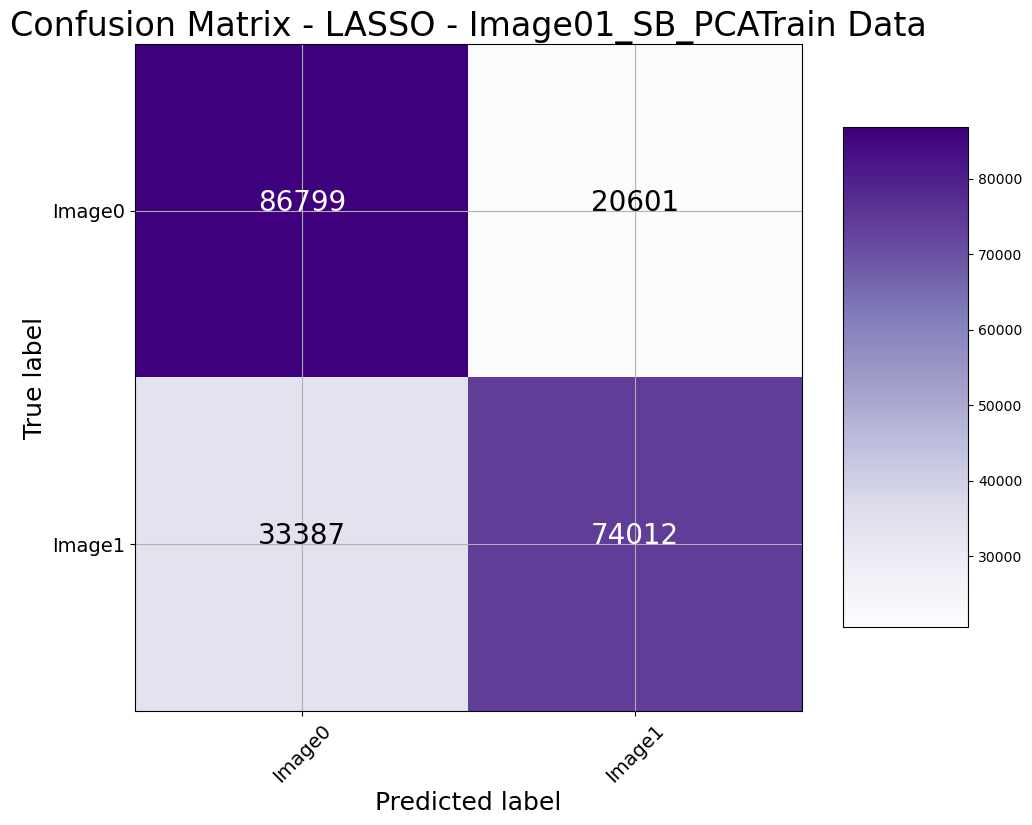

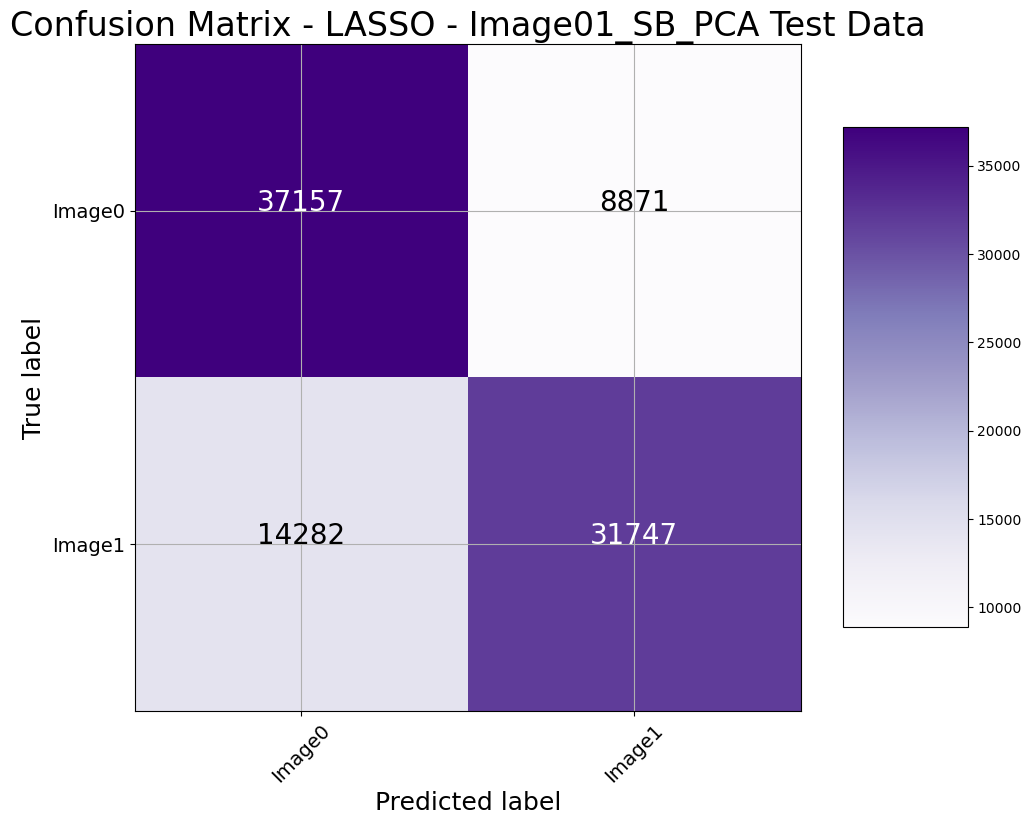

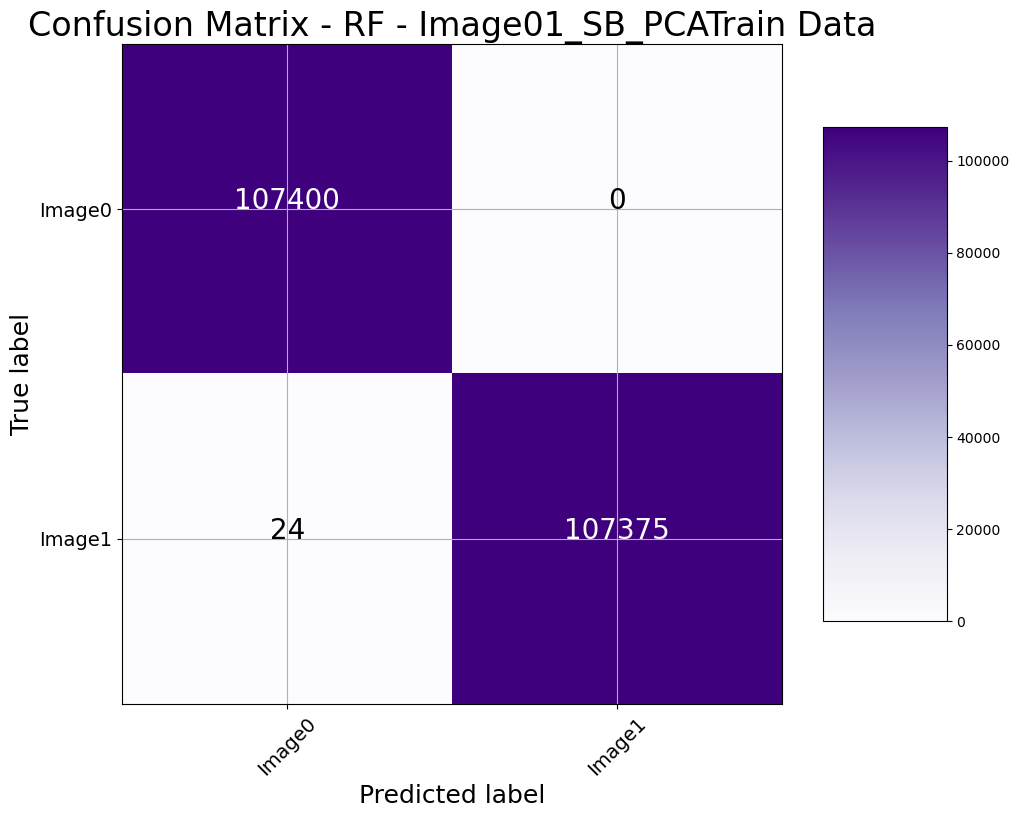

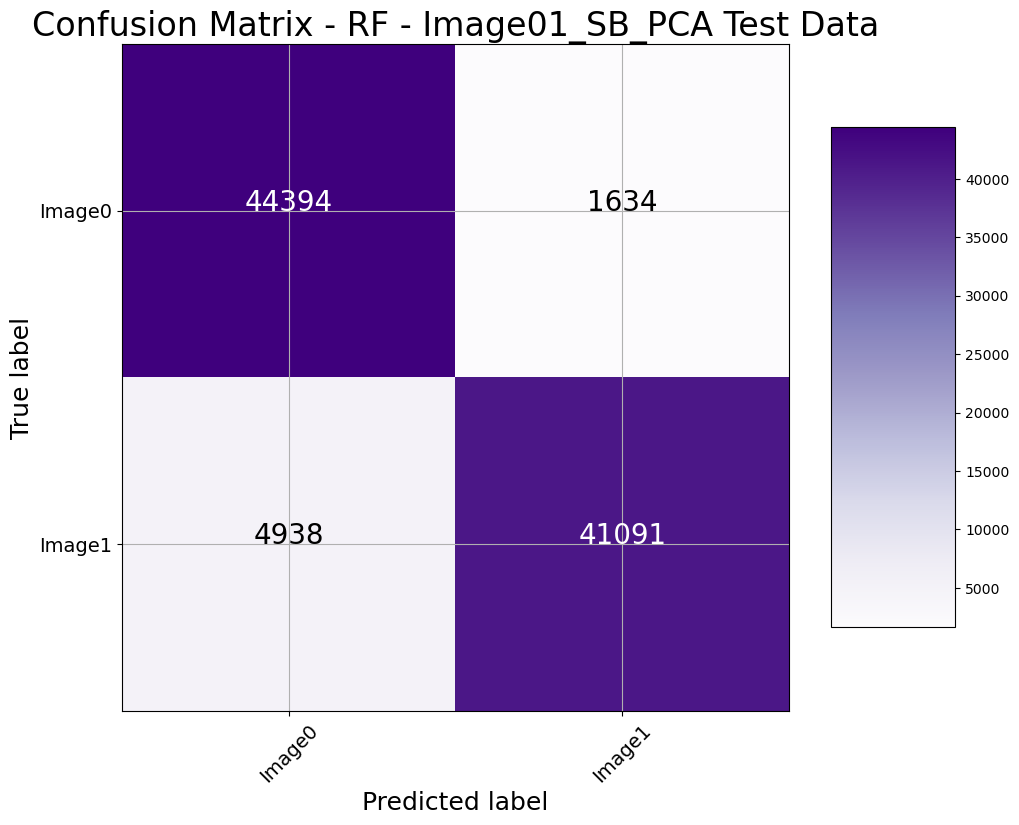

In [15]:
x = image01_SB_X_train_PCA
Y = image01_SB_y_train
x_test = image01_SB_X_test_PCA
Y_test = image01_SB_y_test
label = 'Image01_SB_PCA'
classLabels = ['Image0', 'Image1']
ntrees = 20

LASSOModel(x, Y, x_test, Y_test, label,  classLabels)
RandomForestModel(x, Y, x_test, Y_test, label,  classLabels, ntrees)




In [16]:
# Turning model metrics into a dataframe

ModelMetricsDF_PCA = pd.DataFrame(ModelMetrics, columns=['Dataset',
                                                     'Model', 
                                                     'Train Accuracy', 
                                                     'Train F1 Score',
                                                     'Test Accuracy',
                                                     'Test F1 Score'])

ModelMetricsDF_PCA.sort_values(by = 'Test Accuracy', inplace = True, axis = 0)

ModelMetricsDF_PCA.head(20)

modelMetricName = 'ModelMetrics_PCA_' +str(num_features) + '_Components.csv'

ModelMetricsDF_PCA.to_csv(modelMetricName)

### PCA Model Comparison:
####  The above code was run multiple times changing the 'num_features' variable defined in the PCA cell (cell seven, line three)
####  The PCA number of features ran were: 50, 100, 150, 199.  The full model is 256.

In [17]:
# Importing model metrics from homework 2 & the PCA ones made from reruns of the above code

PCA_50 = pd.read_csv('ModelMetrics_PCA_50_Components.csv')
PCA_100 = pd.read_csv('ModelMetrics_PCA_100_Components.csv')
PCA_150 = pd.read_csv('ModelMetrics_PCA_150_Components.csv')
PCA_199 = pd.read_csv('ModelMetrics_PCA_199_Components.csv')
FullModel = pd.read_csv('ModelMetrics.csv')

In [18]:
PCA_50['Number Features'] = 50
PCA_100['Number Features'] = 100
PCA_150['Number Features'] = 150
PCA_199['Number Features'] = 199
FullModel['Number Features'] = 256

frames = [PCA_50, PCA_100, PCA_150, PCA_199, FullModel]
results = pd.concat(frames).reset_index()


In [19]:
def CompareModels(pairs, plotTitle):
    temp = results[results['Dataset'].isin(pairs)]
    lasso = temp[temp['Model'] == "LASSO"]
    rf = temp[temp['Model'] == "Random Forest"]

    plt.plot(lasso['Number Features'],lasso['Test Accuracy'], label = 'LASSO')
    plt.plot(rf['Number Features'],rf['Test Accuracy'], label = 'Random Forest')
    plt.ylabel('Test Accuracy')
    plt.xlabel('Number of Features')
    plt.title(plotTitle)
    plt.legend()
    plt.savefig(title)



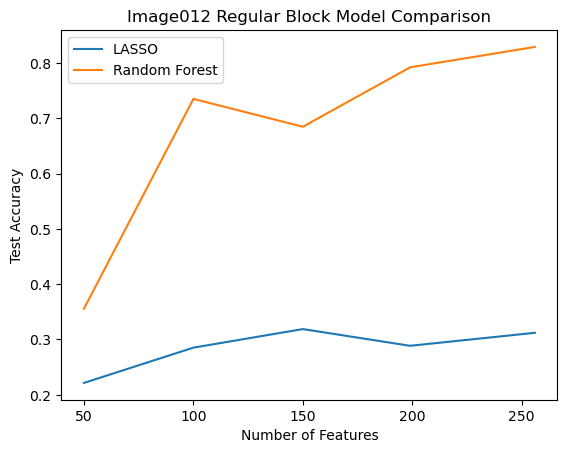

In [20]:
pairs = ['Image012_PCA', 'Image012']
title= 'Image012 Regular Block Model Comparison'

CompareModels(pairs, title)


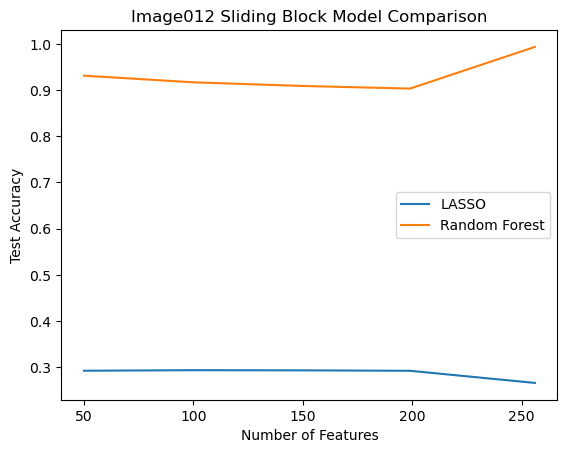

In [21]:
pairs = ['Image012_SB_PCA', 'Image012_SB']
title= 'Image012 Sliding Block Model Comparison'

CompareModels(pairs, title)

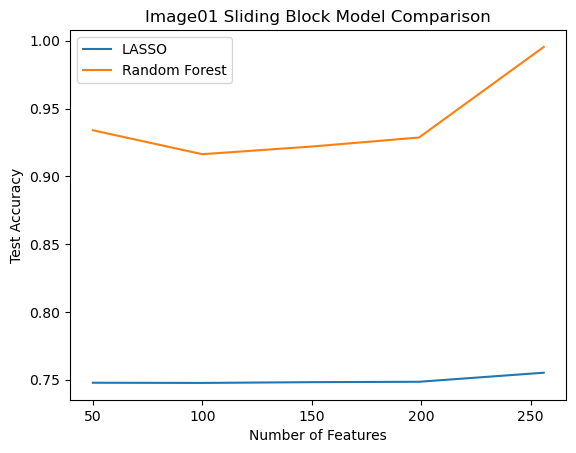

In [22]:
pairs = ['Image01_SB_PCA', 'Image01_SB']
title= 'Image01 Sliding Block Model Comparison'

CompareModels(pairs, title)

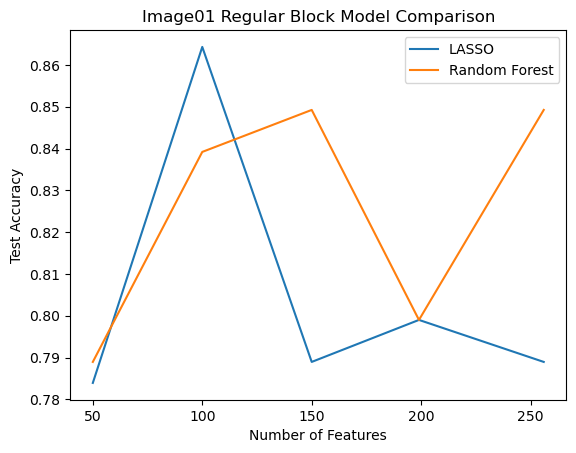

In [23]:
pairs = ['Image01_PCA', 'Image01']
title= 'Image01 Regular Block Model Comparison'

CompareModels(pairs, title)

In [26]:
results.to_csv('Homework3 - All Models Compare Table')